# Getting into the flow of TensorFlow

Jupyter notebooks are simply runtime blocks of python code that can interact with eachother. It's a great tool if you're just trying some stuff out with python, you're trying to document a process, or you want an easy to use and visual system to run your python code.

They are composed of markdown blocks and code blocks. This allows for easy stylized documentation.

Code blocks are executed with the "play" button to the left of the block where the brackets are. Once a block is executed, the output stays in memory and any prints, graphs, images, or tables are saved to the notebook itself. This means that a variable or function defined in another block will be visible to all blocks once the block has been executed. This is both useful and can be a pain since everything that's outside of a function global, as if this is one large python script.

You can always rerun a block of code if you're changed things. The outputs will be overwritten and related variables updated.

## Importing libraries

Libraries can be imported anywhere within your code, but often times, people do so at the top of script so that you have everything you need when working.

You can import libraries as is with a simple `import library`. But often it's useful to abreviate so that you don't need to type out the full name like `import lib`. You can also import a function or sub-library like:
`import lib.sublib as slib` or `from lib.sublib import function as func` which will let you use `func()` anwhere in your code then.

In [4]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Datasets


When doing machine learning, you need a dataset to work with for training and testing. This can be images, text, datapoints in some format like csv, etc. In this case, we will be importing the MNIST handwriting dataset where we will try to build a recognizer that will recognize different handwritten numbers as their respective number.

We first import the data set and then during the load step, we get a split of the data with training samples and testing samples. This is normally an 80/20 split.

The X matrix is composed of "features" which describe the data and the Y matrix (or vector) is composed of "labels" which describe what feature we are trying to predict.

In this case, we are working with images that have been converted to matrices of pixels. By default, the values are white color values from 0 to 255 where 0 is black and 255 is white. Everything in between is a form of grey.

We load the data into X and Y training sets, both are subsets of the full set. We also get an X and Y test set which is a smaller subset of the full set. Both of these sets are independent, they have no overlapping samples which is key to measuring the performance of your model (machine learning system).

We then normalize the color values to be floats of range [0., 1.], allowing tensorflow to work with the data.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


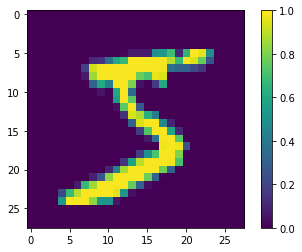

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Training

A model is a machine learning algorithm with a certain set of parameters and a specific data set it trains on. Once it trains, it has a set of 'weights' which make up the model's parameters which is then used for predicting.

We start by gibing some parameters to tensorflow's keras algorithm.

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

We then train the model on a single input, at the same time getting predictions on what class it may be

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.05034987, -0.5623835 , -0.40568018, -0.9989566 ,  0.13403395,
        -0.5725845 ,  0.06224975,  0.7666074 , -0.2527087 ,  0.68588805]],
      dtype=float32)

We then use softmax regression as our activation function to classify the predictions

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.10167953, 0.05509686, 0.06444395, 0.03560619, 0.11055466,
        0.05453767, 0.10289674, 0.20811349, 0.07509601, 0.19197482]],
      dtype=float32)

We get a loss function to test our training loss for an itteration

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

We then compare our prediction to the expected class and get a loss or error

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.9088635

Now we compile our model to make it ready for training

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Now we train the full set

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1426 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1072 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0872 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9770


Here we evaluate on the test set, the accuracy and loss are shown.

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0746 - accuracy: 0.9765


[0.0746423527598381, 0.9764999747276306]

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.7561521e-06, 9.7683817e-09, 4.7838062e-06, 1.0704575e-04,
        3.5496578e-11, 7.9390566e-07, 2.3386213e-11, 9.9986231e-01,
        9.7657653e-07, 2.2211436e-05],
       [1.5959802e-08, 4.6700375e-06, 9.9993229e-01, 5.2654595e-05,
        2.5957246e-12, 1.9332987e-07, 2.7605536e-08, 9.1872918e-13,
        1.0111938e-05, 7.3793567e-12],
       [3.3916713e-08, 9.9980742e-01, 3.1500203e-05, 7.5131248e-07,
        2.5179634e-06, 4.3120453e-06, 2.2713490e-05, 9.9501893e-05,
        3.1307747e-05, 6.8113380e-08],
       [9.9991143e-01, 7.8763385e-11, 4.6582441e-05, 4.1764272e-07,
        1.5265704e-07, 2.2786127e-05, 1.5423513e-05, 2.1970404e-06,
        5.4373311e-07, 5.7743955e-07],
       [7.0146089e-06, 7.5518279e-11, 9.1164975e-06, 1.4580699e-07,
        9.9904102e-01, 2.6308696e-06, 3.4309999e-06, 2.6628300e-05,
        9.7384673e-06, 9.0023078e-04]], dtype=float32)>